### Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### Análise Exploratória de Dados

##### Leitura inicial

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.shape

(30000, 25)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

São 30.000 clientes de cartão de crédito e com a função "describe" conseguimos notar alguns insights:
- O sexo predominante é feminino (mean 1.60).
- A média da idade é de 35 anos com um desvio de 9.2 anos (26 a 44 anos), o que mostra um público jovem-adulto ativo.
- O maior limite de crédito (máx) é de 1.000.000$ e o 75% é 240.000$, é um exemplo de outlier extremo, faz com que a média seja maior que a mediana: os "muito-ricos" trazem a média para cima.
- Cerca de 78% das pessoas pagaram o próximo mês, nosso foco é os 22% (default 0.22)
- A média do PAY_0 é negativa, a maioria das pessoas paga adiantado ou no dia.
- [Dados sujos] MARRIAGE e EDUCATION mostram min: 0, mas suas categorias começam a partir de 1, será necessário imputação dos valores.
- Não há ocorrência de dados faltantes (NaN).

In [7]:
sujos = ['EDUCATION', 'MARRIAGE']
for i in sujos:
    print(df[i].value_counts())
porcent_edu = (df.EDUCATION == 0).sum()/(df.shape[0])
porcent_mar = (df.MARRIAGE == 0).sum()/(df.shape[0])
print(f"\nPorcentagem de variável 0 em EDUCATION: {100 * porcent_edu:.2f}% e MARRIAGE: {100 * porcent_mar:.2f}%.")

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

Porcentagem de variável 0 em EDUCATION: 0.05% e MARRIAGE: 0.18%.


A estratégia é agrupar categoria 5, 6 e 0 de EDUCATION, e 0 de MARRIAGE em "Others"

In [8]:
df.loc[df.EDUCATION.isin([0, 5, 6]), 'EDUCATION'] = 4
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
for i in sujos:
    print(df[i].value_counts())
print(f'\n✅ DADOS LIMPOS')

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

✅ DADOS LIMPOS


#### [EDA] Análise Exploratória de Dados

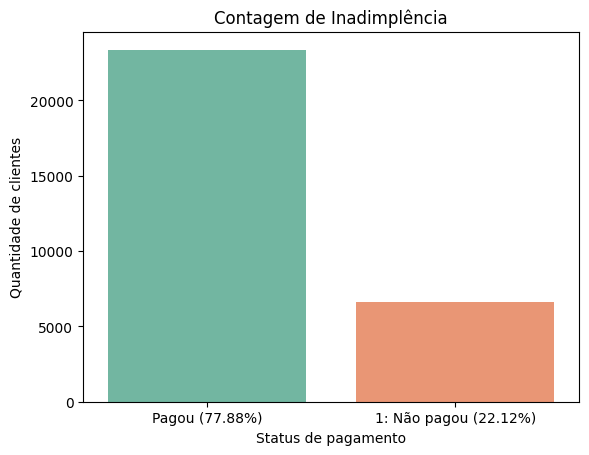

In [9]:
sns.countplot(x='default.payment.next.month', data=df, palette='Set2')
df1_mean = df['default.payment.next.month'].mean() * 100
df0_mean = 100 - df1_mean

plt.title('Contagem de Inadimplência')
plt.ylabel('Quantidade de clientes')
plt.xlabel('Status de pagamento')
plt.xticks([0, 1], [f'Pagou ({df0_mean}%)', f'1: Não pagou ({df1_mean}%)'])
plt.show()

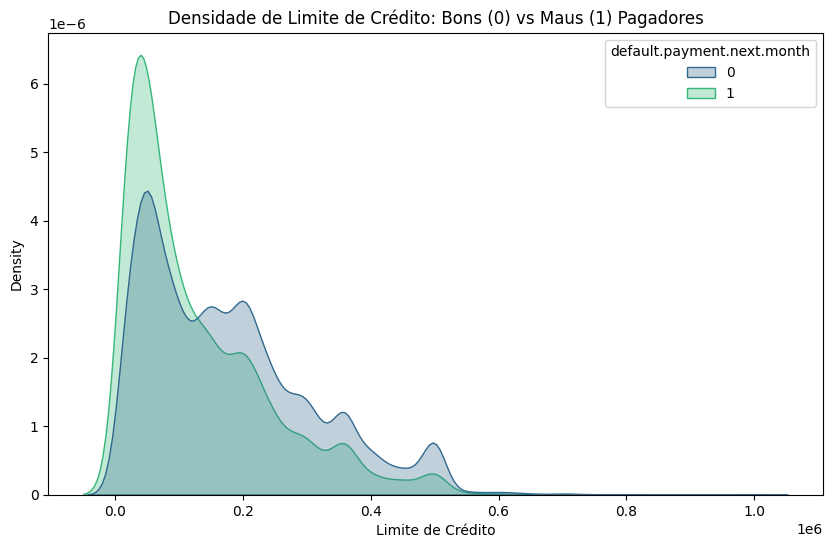

In [10]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='LIMIT_BAL', hue='default.payment.next.month', 
            fill=True, common_norm=False, palette='viridis', alpha=0.3)
plt.title('Densidade de Limite de Crédito: Bons (0) vs Maus (1) Pagadores')
plt.xlabel('Limite de Crédito')
plt.show()

Apesar da sobreposição significativa, a densidade de defaults (curva verde) é claramente maior em limites baixos (0-100k). Isso sugere que o risco é inversamente proporcional ao limite concedido.

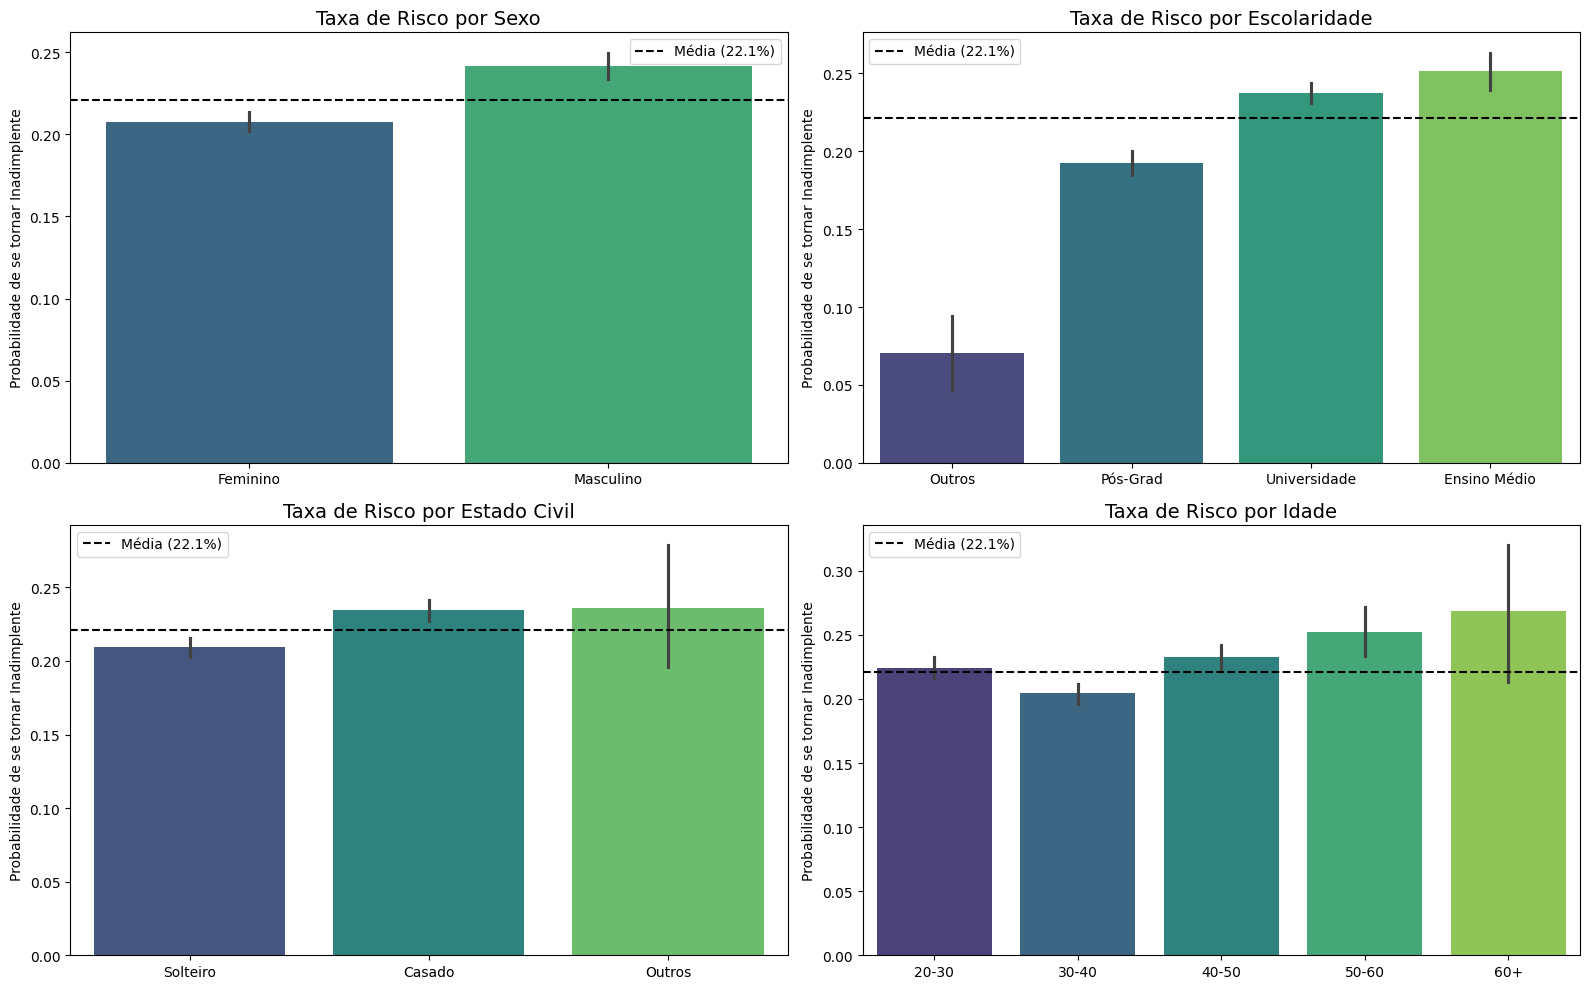

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df.rename(columns={'SEX':'Sexo'}, inplace=True)
df.rename(columns={'EDUCATION':'Escolaridade'}, inplace=True)
df.rename(columns={'MARRIAGE':'Estado Civil'}, inplace=True)
df['Idade'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 80], labels=['20-30', '30-40', '40-50', '50-60', '60+'])

plots_config = [
    {'col': 'Sexo', 'labels': ['Masculino', 'Feminino']},
    {'col': 'Escolaridade', 'labels': ['Pós-Grad', 'Universidade', 'Ensino Médio', 'Outros']},
    {'col': 'Estado Civil', 'labels': ['Casado', 'Solteiro', 'Outros']},
    {'col': 'Idade', 'labels': None}]


fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

media_geral = df['default.payment.next.month'].mean()

for i, config in enumerate(plots_config):
    col = config['col']
    ax = axes[i] 
    if col == 'Idade':
        order = ['20-30', '30-40', '40-50', '50-60', '60+']
    else:
        order = df.groupby(col)['default.payment.next.month'].mean().sort_values().index

    sns.barplot(x=col, y='default.payment.next.month', data=df, 
        order=order, palette='viridis', ax=ax)
    
    ax.axhline(media_geral, color='k', linestyle='--', label=f'Média ({media_geral:.1%})')
    ax.set_title(f'Taxa de Risco por {col}', fontsize=14)
    ax.set_ylabel('Probabilidade de se tornar Inadimplente')
    ax.set_xlabel('')
    ax.legend()

    if config['labels']:
        new_labels = []
        for val in order:
            idx = int(val) - 1
            
            if 0 <= idx < len(config['labels']):
                new_labels.append(config['labels'][idx])
            else:
                new_labels.append(f'Outros ({val})')
        ax.set_xticklabels(new_labels)

plt.tight_layout()
plt.show()

O grupo mais seguro não são os mais velhos, mas sim os adultos jovens (30-40 anos), que estão significativamente abaixo da linha de risco. O risco sobe drasticamente para idosos (60+), provavelmente devido à restrição de renda na aposentadoria. Casados apresentam um risco maior que a média e maior que os solteiros, isso sugere que o custo familiar pode estar pesando no orçamento, gerando inadimplência.

Existe também uma escada clara de risco baseada na educação. Clientes com apenas Ensino Médio são os mais perigosos (barra verde clara, bem acima da linha média). Conforme a escolaridade sobe para Universidade e Pós-Graduação, o risco cai degrau por degrau. Isso valida a hipótese de que maior escolaridade correlaciona com maior estabilidade financeira ou empregabilidade.

Embora seja uma diferença menor, é visível: Homens (Masculino) estão acima da linha de risco, enquanto Mulheres (Feminino) estão abaixo. Mulheres, nesta base, honram melhor seus compromissos.

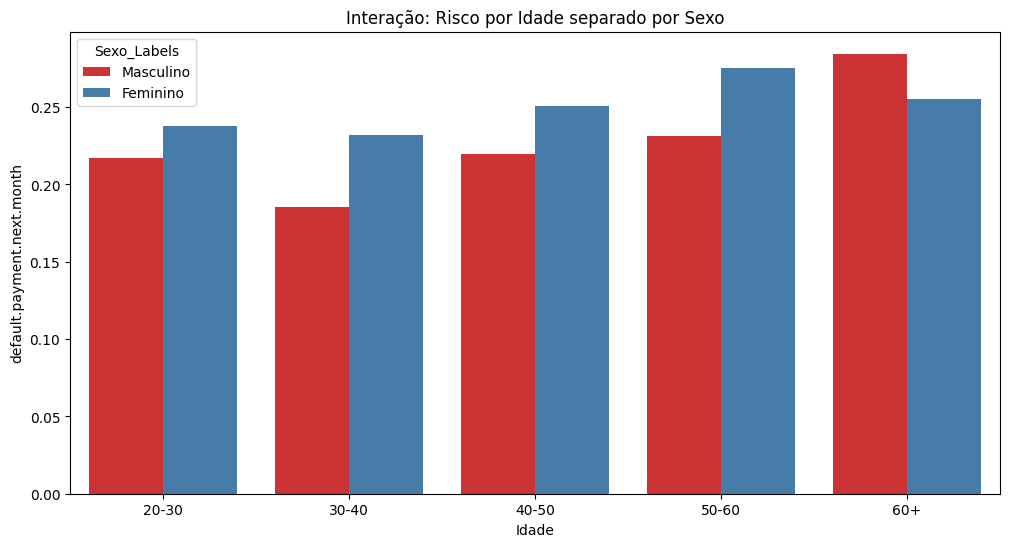

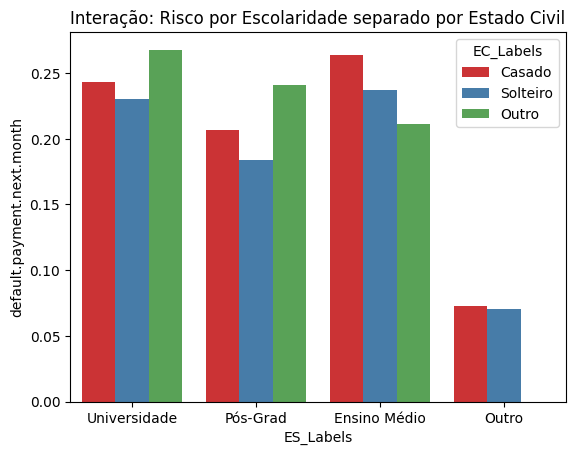

In [23]:
df['Sexo_Labels'] = df['Sexo'].map({1: 'Feminino', 2: 'Masculino'})
plt.figure(figsize=(12, 6))
sns.barplot(x='Idade', y='default.payment.next.month', hue='Sexo_Labels', palette='Set1', data=df, errorbar=None)
plt.title('Interação: Risco por Idade separado por Sexo')
plt.show()

df['EC_Labels'] = df['Estado Civil'].map({1: 'Casado', 2: 'Solteiro', 3: 'Outro'})
df['ES_Labels'] = df['Escolaridade'].map({1: 'Pós-Grad', 2: 'Universidade', 3: 'Ensino Médio', 4: 'Outro'})
sns.barplot(x='ES_Labels', y='default.payment.next.month', hue='EC_Labels', palette='Set1', data=df, errorbar=None)
plt.title('Interação: Risco por Escolaridade separado por Estado Civil')
plt.show()

Agora na visão macro:
1. Homens parecem mais arriscados até acima de 60 anos, onde possuem o mesmo risco que mulheres, sugerindo que o problema está concentrado nos homens jovens. 
2. O risco permanece em casados, evidenciando essa provável dificuldade em sustento, gerando default.

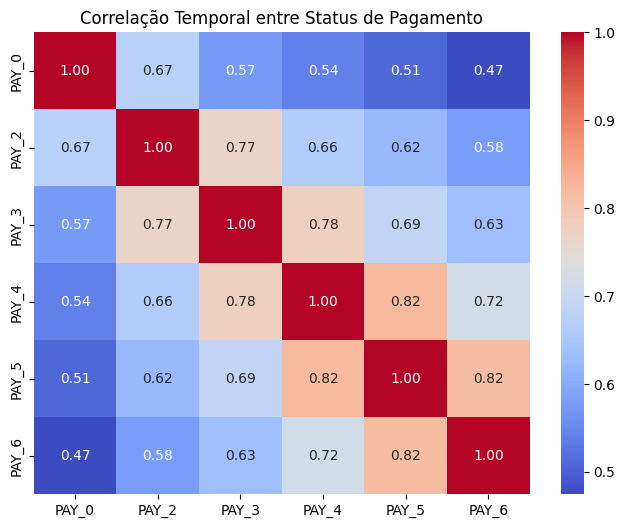

In [ ]:
cols_pagamento = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
corr_pagamento = df[cols_pagamento].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_pagamento, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação Temporal entre Status de Pagamento')
plt.show()

Decaimento na correlação conforme a distância temporal aumenta. O PAY_0 (Setembro) tem alta correlação com PAY_2 (Agosto), mas baixa com PAY_6 (Abril).
Ou seja, o comportamento imediato do cliente é o melhor preditor de risco. Um atraso há 6 meses, se regularizado, é menos grave que um atraso atual."

Clientes que estouram o limite (Utilização próxima ou acima de 1.0) apresentam maior tendência ao default. Esta variável derivada (CREDIT_UTILIZATION) provavelmente terá um 'Feature Importance' maior no modelo do que o valor absoluto da fatura.

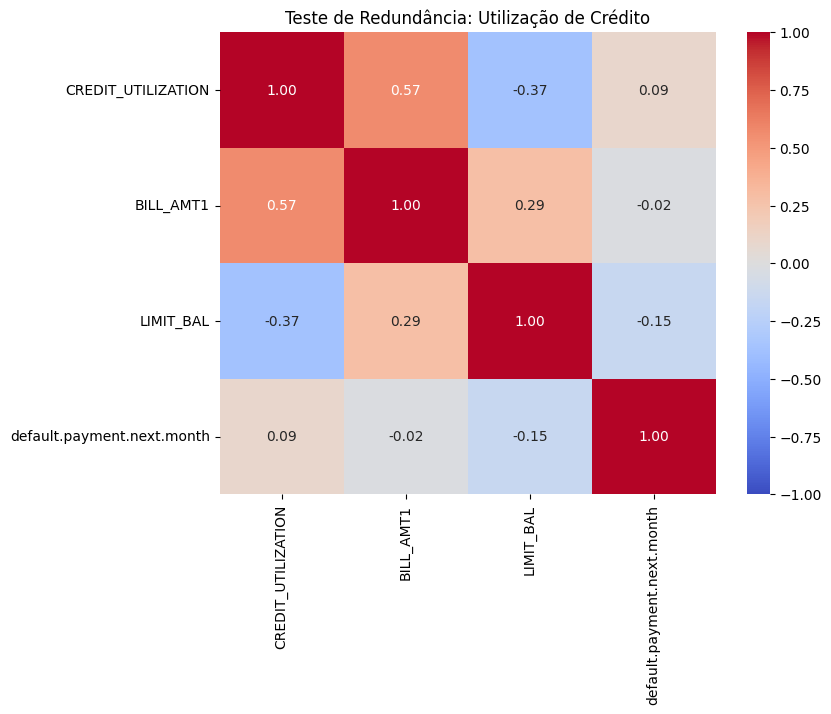

In [ ]:
# 2. Matriz de Correlação Focada
features_analise = ['CREDIT_UTILIZATION', 'BILL_AMT1', 'LIMIT_BAL', 'default.payment.next.month']
correlacao = df[features_analise].corr()

# Plotar para visualizar
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Teste de Redundância: Utilização de Crédito')
plt.show()

Inicialmente, o valor da fatura não tinha correlação com o risco (-0.02). Ao transformarmos isso em 'Utilização de Crédito', conseguimos capturar um sinal de risco muito mais forte (0.09), provando que o comportamento proporcional importa mais que o valor absoluto. = A sua variável é 4,5 vezes mais poderosa para prever a inadimplência do que a variável original.

In [26]:
cols_bill = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
cols_pay = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


df['CREDIT_UTILIZATION'] = df['BILL_AMT1'] / df['LIMIT_BAL']
# Feature 1: AVG UTILIZATION (6 Meses)
# Média das faturas dos últimos 6 meses dividido pelo limite atual.
df['AVG_UTILIZATION_6M'] = df[cols_bill].mean(axis=1) / df['LIMIT_BAL']
# Não serve = Alta correlação = 91%

# Feature 2: UTILIZATION GROWTH (Tendência)
# Diferença entre a fatura atual (Setembro) e a de 6 meses atrás (Abril), normalizada pelo limite.
df['UTILIZATION_GROWTH_6M'] = (df['BILL_AMT1'] - df['BILL_AMT6']) / df['LIMIT_BAL']

# Payment ratio (proporção paga da fatura)
df['payment_ratio1'] = df['PAY_AMT1'] / df['BILL_AMT1'].replace(0, np.nan)

# Diferença entre valor da fatura e valor pago
df['payment_diff1'] = df['PAY_AMT1'] - df['BILL_AMT1']



print(df[['AVG_UTILIZATION_6M', 'UTILIZATION_GROWTH_6M', 'utilization_1', 'payment_ratio1', 'payment_diff1']].head())

   AVG_UTILIZATION_6M  UTILIZATION_GROWTH_6M  utilization_1  payment_ratio1  \
0            0.064200               0.195650       0.195650        0.000000   
1            0.023718              -0.004825       0.022350        0.000000   
2            0.188246               0.152111       0.324878        0.051917   
3            0.771113               0.348860       0.939800        0.042562   
4            0.364463              -0.210280       0.172340        0.232099   

   payment_diff1  
0        -3913.0  
1        -2682.0  
2       -27721.0  
3       -44990.0  
4        -6617.0  


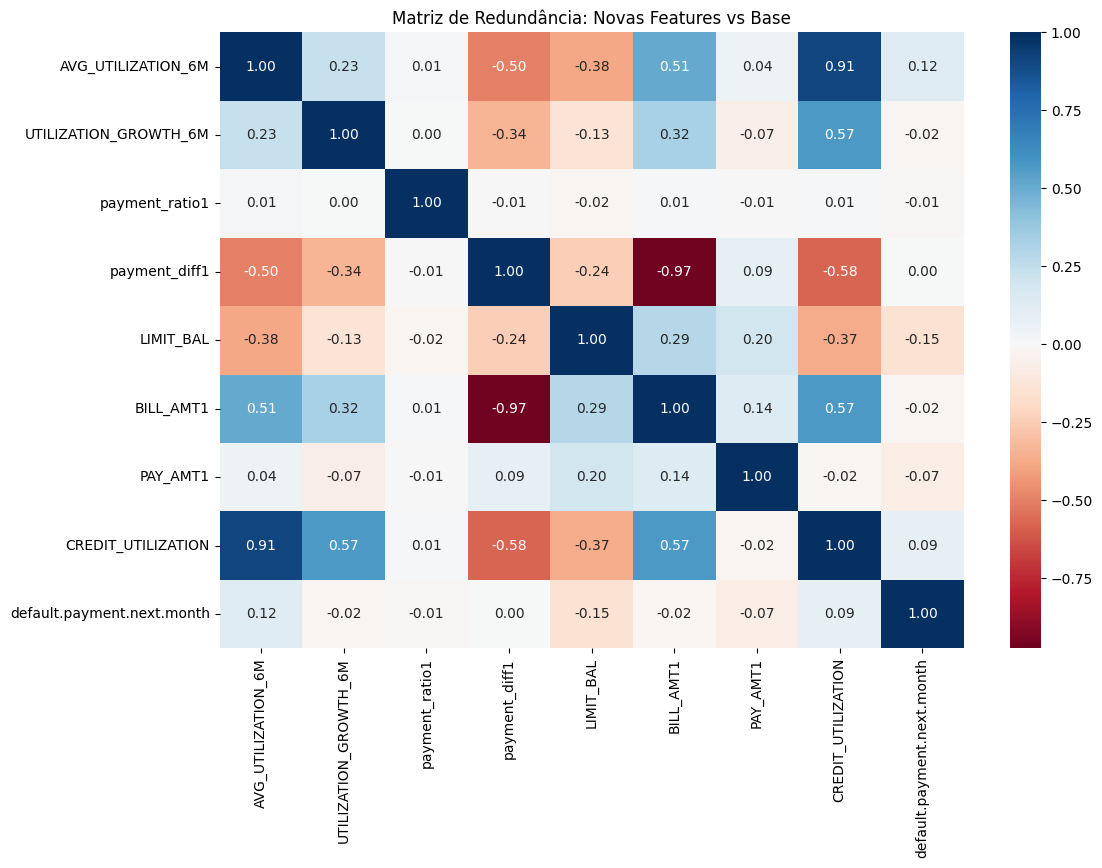

In [ ]:

features_novas = ['AVG_UTILIZATION_6M', 'UTILIZATION_GROWTH_6M', 'payment_ratio1', 'payment_diff1']
features_base = ['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'CREDIT_UTILIZATION']
target = ['default.payment.next.month']

cols_analise = features_novas + features_base + target
correlacao = df[cols_analise].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='RdBu', fmt=".2f", center=0)
plt.title('Matriz de Redundância: Novas Features vs Base')
plt.show()

Devido à alta colinearidade (0.91), optei por manter apenas a variável mais recente (CREDIT_UTILIZATION) para modelos lineares, evitando distorções.

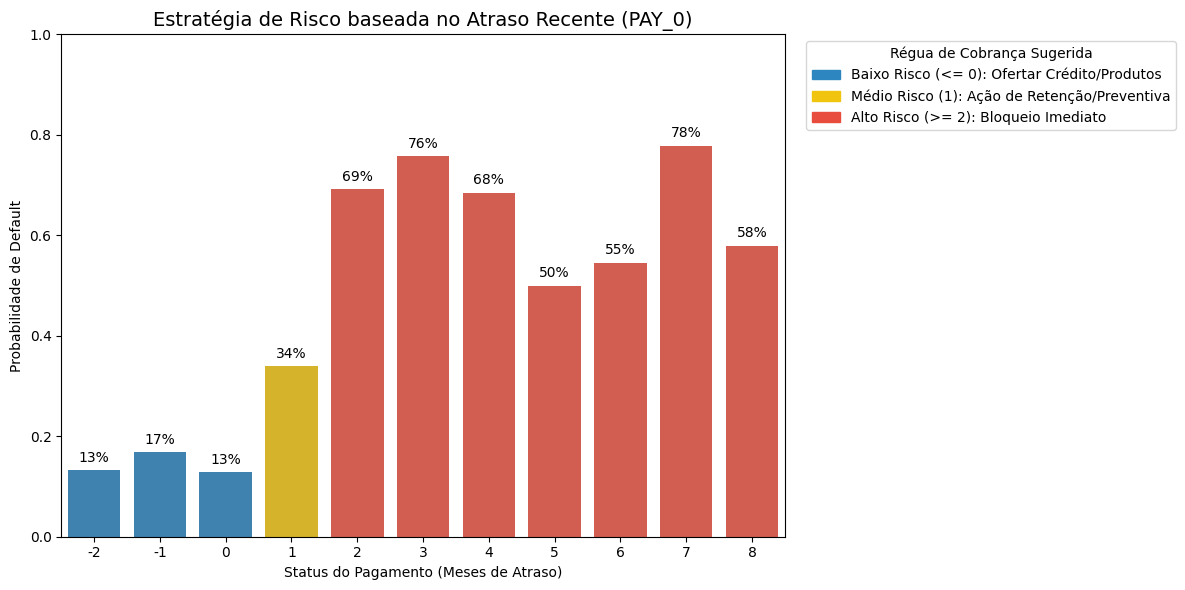

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

pay0_risk = df.groupby('PAY_0')['default.payment.next.month'].mean()

cores_estrategia = []
for val in pay0_risk.index:
    if val <= 0:
        cores_estrategia.append('#2e86c1') # Azul (Zona de Oportunidade)
    elif val == 1:
        cores_estrategia.append('#f1c40f') # Amarelo (Zona de Atenção)
    else:
        cores_estrategia.append('#e74c3c') # Vermelho (Zona de Bloqueio)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=pay0_risk.index, y=pay0_risk.values, palette=cores_estrategia)

legenda_azul = mpatches.Patch(color='#2e86c1', label='Baixo Risco (<= 0): Ofertar Crédito/Produtos')
legenda_amarela = mpatches.Patch(color='#f1c40f', label='Médio Risco (1): Ação de Retenção/Preventiva')
legenda_vermelha = mpatches.Patch(color='#e74c3c', label='Alto Risco (>= 2): Bloqueio Imediato')

plt.legend(handles=[legenda_azul, legenda_amarela, legenda_vermelha], 
           title='Régua de Cobrança Sugerida', 
           bbox_to_anchor=(1.02, 1), loc='upper left')

plt.title("Estratégia de Risco baseada no Atraso Recente (PAY_0)", fontsize=14)
plt.xlabel("Status do Pagamento (Meses de Atraso)")
plt.ylabel("Probabilidade de Default")
plt.ylim(0, 1.0) 


for p in ax.patches:
    ax.annotate(f'{p.get_height():.0%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

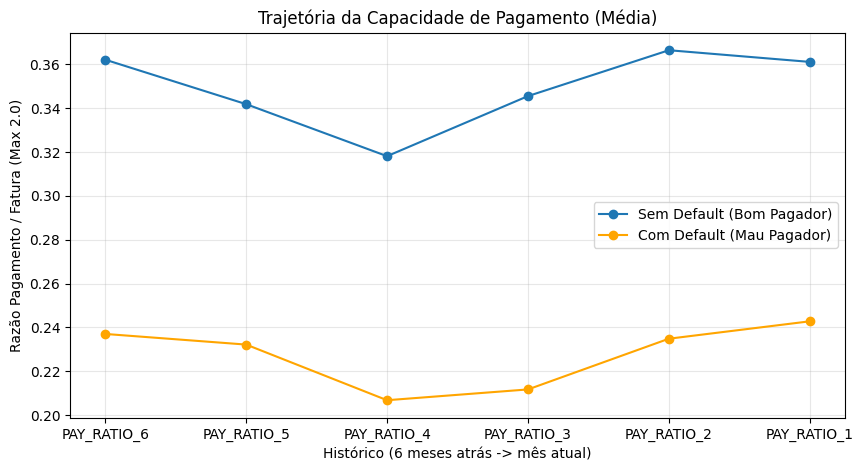

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Criação das colunas com tratamento de outliers
for i in range(1, 7):
    col_pay = df[f'PAY_AMT{i}']
    col_bill = df[f'BILL_AMT{i}']
    
    # Lógica: Se a fatura for <= 0, definimos como NaN (não conta para a média)
    # Se for > 0, fazemos a divisão normal.
    condition = col_bill > 0
    df[f'PAY_RATIO_{i}'] = np.where(condition, col_pay / col_bill, np.nan)
    
    # Opcional: Limitar razões absurdas. Ex: Se pagou mais que 2x a fatura, limitamos a 2.
    # Isso evita que um erro de dado "amasse" o gráfico.
    df[f'PAY_RATIO_{i}'] = df[f'PAY_RATIO_{i}'].clip(upper=2)

# 2. Redefinir good/bad (IMPORTANTE: fazer isso DEPOIS de criar as colunas acima)
df_good = df[df['default.payment.next.month'] == 0]
df_bad = df[df['default.payment.next.month'] == 1]

# 3. Lista de colunas na ordem temporal (da mais antiga para a mais recente ou vice-versa)
# 6 (Abril) -> 1 (Setembro)
ratio_cols = [f'PAY_RATIO_{i}' for i in range(6, 0, -1)]

# 4. Calcular médias (o pandas ignora automaticamente os NaNs)
good_ratio = df_good[ratio_cols].mean()
bad_ratio = df_bad[ratio_cols].mean()

# 5. Plotar
plt.figure(figsize=(10, 5))
plt.plot(ratio_cols, good_ratio, label='Sem Default (Bom Pagador)', marker='o')
plt.plot(ratio_cols, bad_ratio, label='Com Default (Mau Pagador)', marker='o', color='orange')

plt.title('Trajetória da Capacidade de Pagamento (Média)')
plt.ylabel('Razão Pagamento / Fatura (Max 2.0)')
plt.xlabel('Histórico (6 meses atrás -> mês atual)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

A análise temporal revela que o default não ocorre de forma repentina, é observado uma deterioração progressiva do comportamento financeiro. Esses sinais tornam-se mais evidentes nos últimos três meses antes do evento, indicando uma janela clara para intervenção preventiva. Este gráfico mostra que o cliente inadimplente (laranja) já vinha demonstrando fraqueza financeira há 6 meses, enquanto os bons clientes (azul) se esforçam para pagar, em média, mais de 35% de suas dívidas totais, os clientes de risco (laranja) patinam perto dos 20%. 

Insight para predição: Se a razão (Pagamento / Fatura) de um cliente cair abaixo de 0.25 por dois meses seguidos, devemos acionar um alerta de risco, mesmo que ele ainda não tenha atrasado oficialmente.